In [49]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import os
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib
matplotlib.rcParams['pgf.texsystem'] = 'pdflatex'
matplotlib.rcParams.update({'font.family':'Arial','font.size': 18,
    'axes.labelsize': 20,'axes.titlesize': 20, 'figure.titlesize' : 20})
matplotlib.rcParams['text.usetex'] = False
import matplotlib.gridspec as gridspec
from matplotlib.patheffects import withStroke
from collections import defaultdict
# from mpl_toolkits import mplot3d
# from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

In [3]:
path = "plaid_csvs/vqvae_fsq.csv"
df = pd.read_csv(path, sep=",")

In [4]:
vq_df = df[df.Name == "cath-vqvae"]
fsq_df = df[df.Name == "cath-fsq"]

In [5]:
vq_df['cfg.hourglass.n_e'] = vq_df['cfg.hourglass.n_e'].astype(int)
vq_df

/tmp/ipykernel_57656/3913722763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vq_df['cfg.hourglass.n_e'] = vq_df['cfg.hourglass.n_e'].astype(int)


,Name,cfg.hourglass.n_e,cfg.hourglass.fsq_levels,ID,Runtime,Commit,GitHub,End Time,Hostname,Notes,...,train/vq_loss,train/vq_perplexity,val/vq_loss,val/vq_perplexity,cfg.hourglass.downproj_factor,cfg.hourglass.shorten_factor,Created,structure_reconstruction/vq_loss,structure_reconstruction/vq_perplexity,cfg.datamodule.batch_size
7,cath-vqvae,64,NaN,sbrib6ob,42914,70778171561478e18d5733d182388820f034d920,https://github.com/amyxlu/plaid-dev-distribute...,2024-05-21T10:27:44.000Z,gpu2-st-a100x8-1-17,-,...,0.003813,5.486956,0.003837,5.760293,1,1,2024-05-20T22:32:30.000Z,0.012630,44.002144,64
8,cath-vqvae,4096,NaN,qmbg5t8m,42914,70778171561478e18d5733d182388820f034d920,https://github.com/amyxlu/plaid-dev-distribute...,2024-05-21T10:27:44.000Z,gpu2-st-a100x8-1-17,-,...,0.005823,12.237287,0.005455,7.426789,1,1,2024-05-20T22:32:30.000Z,0.019015,81.537415,64
9,cath-vqvae,1024,NaN,a1z93f0w,43233,70778171561478e18d5733d182388820f034d920,https://github.com/amyxlu/plaid-dev-distribute...,2024-05-21T10:33:03.000Z,gpu2-st-a100x8-1-1,-,...,0.004430,7.810396,0.004697,8.001155,4,1,2024-05-20T22:32:30.000Z,0.013539,97.947548,128
10,cath-vqvae,256,NaN,4p7efzza,42860,70778171561478e18d5733d182388820f034d920,https://github.com/amyxlu/plaid-dev-distribute...,2024-05-21T10:26:50.000Z,gpu2-st-a100x8-1-1,-,...,0.004055,6.354888,0.004064,7.149798,4,1,2024-05-20T22:32:30.000Z,0.011721,81.716156,128
11,cath-vqvae,16384,NaN,pjr3qhkp,42948,70778171561478e18d5733d182388820f034d920,https://github.com/amyxlu/plaid-dev-distribute...,2024-05-21T10:26:58.000Z,gpu2-st-a100x8-1-8,-,...,0.013473,50.216381,0.012511,20.239336,4,1,2024-05-20T22:31:10.000Z,0.032638,54.336506,128
12,cath-vqvae,65536,NaN,g69njjq4,42950,70778171561478e18d5733d182388820f034d920,https://github.com/amyxlu/plaid-dev-distribute...,2024-05-21T10:27:00.000Z,gpu2-st-a100x8-1-8,-,...,0.012032,62.277126,0.012736,22.529156,4,1,2024-05-20T22:31:10.000Z,0.044255,33.719593,64
13,cath-vqvae,16,NaN,5lha1r65,42945,70778171561478e18d5733d182388820f034d920,https://github.com/amyxlu/plaid-dev-distribute...,2024-05-21T10:26:55.000Z,gpu2-st-a100x8-1-3,-,...,0.000737,1.244260,0.000941,1.260155,4,1,2024-05-20T22:31:10.000Z,0.002884,2.045713,128


In [6]:
fsq2 = pd.read_csv("plaid_csvs/cath_fsq_240627.csv")
print(fsq2.shape)
fsq2.head()

(43, 60)


,Name,cfg.hourglass.downproj_factor,cfg.hourglass.fsq_levels,ID,Runtime,cfg.datamodule.batch_size,Commit,GitHub,End Time,Hostname,...,Created,structure_reconstruction/vq_loss,structure_reconstruction/vq_perplexity,cfg.trainer.check_val_every_n_epoch,cfg.trainer.num_nodes,cfg.trainer.strategy,cfg.use_compression_callback,cfg.use_compresson_callback,cfg.trainer.profiler,cfg.hourglass.n_e
0,cath-fsq-large,1,"[8,8,8,6,5]",r2ubsj1i,4008,2,2ba1bfb6eb85b7751962ecd1b86cba1e9f65aa86,https://github.com/amyxlu/plaid-dev-distribute...,2024-06-17T22:38:59.000Z,gpu2-st-a100x8-1-7,...,2024-06-17T21:32:11.000Z,NaN,NaN,1000.0,1.0,ddp,False,False,advanced,512
1,cath-fsq-large,1,"[8,8,8,6,5]",8wcdmu0m,615,2,2ba1bfb6eb85b7751962ecd1b86cba1e9f65aa86,https://github.com/amyxlu/plaid-dev-distribute...,2024-06-17T21:30:25.000Z,gpu2-st-a100x8-1-7,...,2024-06-17T21:20:10.000Z,NaN,NaN,1000.0,1.0,ddp,False,False,advanced,512
2,cath-fsq-large,1,"[8,8,8,6,5]",ixykb0w3,502,2,2ba1bfb6eb85b7751962ecd1b86cba1e9f65aa86,https://github.com/amyxlu/plaid-dev-distribute...,2024-06-17T21:17:07.000Z,gpu2-st-a100x8-1-7,...,2024-06-17T21:08:45.000Z,NaN,NaN,1000.0,1.0,ddp,False,False,NaN,512
3,cath-fsq-large,1,"[8,8,8,6,5]",by9eoks7,106,2,2ba1bfb6eb85b7751962ecd1b86cba1e9f65aa86,https://github.com/amyxlu/plaid-dev-distribute...,2024-06-17T20:25:23.000Z,gpu2-st-a100x8-1-7,...,2024-06-17T20:23:37.000Z,NaN,NaN,1000.0,1.0,ddp,False,False,NaN,512
4,cath-fsq-large,1,"[8,8,8,6,5]",7i7absf8,90,4,2ba1bfb6eb85b7751962ecd1b86cba1e9f65aa86,https://github.com/amyxlu/plaid-dev-distribute...,2024-06-17T20:19:46.000Z,gpu2-st-a100x8-1-7,...,2024-06-17T20:18:16.000Z,NaN,NaN,1000.0,1.0,ddp,False,False,NaN,512


In [7]:
def mapping_fn(s):
    mapping = {
        "[4,4]": 2 ** 4,
        "[4,4,4]": 2 ** 6,
        "[8,6,5]": 2 ** 8,
        "[8,5,5,5]": 2 ** 10,
        "[7,5,5,5,5]": 2 ** 12,
        "[8,8,8,6,5]": 2 ** 14,
        "[8,8,8,5,5,5]": 2 ** 16
    }
    try:
        return mapping[s]
    except KeyError:
        return np.nan

fsq_df['codebook'] = fsq_df['cfg.hourglass.fsq_levels'].map(lambda x: mapping_fn(x))
fsq2['codebook'] = fsq2['cfg.hourglass.fsq_levels'].map(lambda x: mapping_fn(x))

/tmp/ipykernel_57656/1223512316.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fsq_df['codebook'] = fsq_df['cfg.hourglass.fsq_levels'].map(lambda x: mapping_fn(x))


In [8]:
fsq_df = fsq_df.sort_values(by="codebook")
vq_df = vq_df.rename({"cfg.hourglass.n_e": "codebook"}, axis=1)
vq_df = vq_df.sort_values(by="codebook")

In [10]:
fsq2 = fsq2.sort_values(by="Runtime", ascending=False)
fsq_df = fsq2.groupby('codebook').first().reset_index()
fsq_df['codebook'] = fsq_df['codebook'].astype(int)
fsq_df.head()

,codebook,Name,cfg.hourglass.downproj_factor,cfg.hourglass.fsq_levels,ID,Runtime,cfg.datamodule.batch_size,Commit,GitHub,End Time,...,Created,structure_reconstruction/vq_loss,structure_reconstruction/vq_perplexity,cfg.trainer.check_val_every_n_epoch,cfg.trainer.num_nodes,cfg.trainer.strategy,cfg.use_compression_callback,cfg.use_compresson_callback,cfg.trainer.profiler,cfg.hourglass.n_e
0,16,cath-fsq,4,"[4,4]",nvn50hrl,214497,128,70778171561478e18d5733d182388820f034d920,https://github.com/amyxlu/plaid-dev-distribute...,2024-05-24T02:55:38.000Z,...,2024-05-21T15:20:41.000Z,NaN,NaN,NaN,NaN,None,None,None,None,128
1,64,cath-fsq,4,"[4,4,4]",i0849b6g,135437,128,70778171561478e18d5733d182388820f034d920,https://github.com/amyxlu/plaid-dev-distribute...,2024-05-23T04:57:58.000Z,...,2024-05-21T15:20:41.000Z,NaN,NaN,NaN,NaN,None,None,None,None,128
2,256,cath-fsq,4,"[8,6,5]",plnochic,228713,128,70778171561478e18d5733d182388820f034d920,https://github.com/amyxlu/plaid-dev-distribute...,2024-05-24T06:52:35.000Z,...,2024-05-21T15:20:42.000Z,NaN,NaN,NaN,NaN,None,None,None,None,128
3,1024,cath-fsq,4,"[8,5,5,5]",o039qrp2,476322,128,70778171561478e18d5733d182388820f034d920,https://github.com/amyxlu/plaid-dev-distribute...,2024-05-27T03:39:26.000Z,...,2024-05-21T15:20:44.000Z,NaN,NaN,NaN,NaN,None,None,None,None,128
4,4096,cath-fsq,4,"[7,5,5,5,5]",9nsanh7x,476320,128,70778171561478e18d5733d182388820f034d920,https://github.com/amyxlu/plaid-dev-distribute...,2024-05-27T03:39:25.000Z,...,2024-05-21T15:20:45.000Z,NaN,NaN,NaN,NaN,None,None,None,None,128


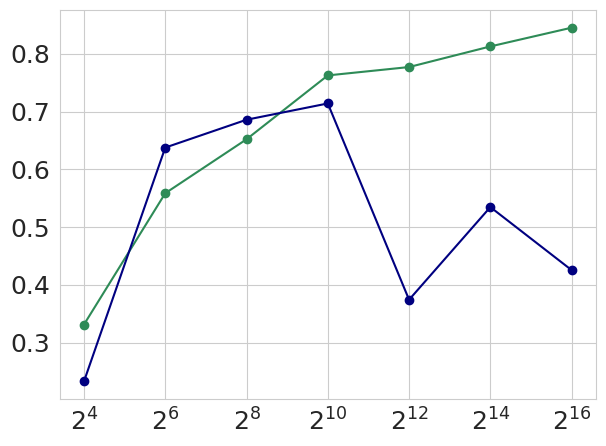

In [19]:
# plt.rcParams['text.usetex'] = False
# plt.rcParams['figure.dpi'] = 200
# plt.rcParams['figure.figsize'] = (4,4)
# plt.rcParams['font.family'] = 'serif'

sns.set_style("whitegrid")
fig,ax = plt.subplots()
ax.set_xscale("log",base=2)

from matplotlib.ticker import FuncFormatter


ax.plot(fsq_df['codebook'].values, fsq_df['structure_reconstruction/tmscore_mean'].values, label="FSQ", marker="o", color='seagreen')
ax.plot(vq_df['codebook'].values, vq_df['structure_reconstruction/tmscore_mean'].values, label="VQ-VAE", marker="o", color='navy')
ax.set_xticks(np.power(2, np.arange(4, 17, 2)))
plt.tight_layout()
plt.show()

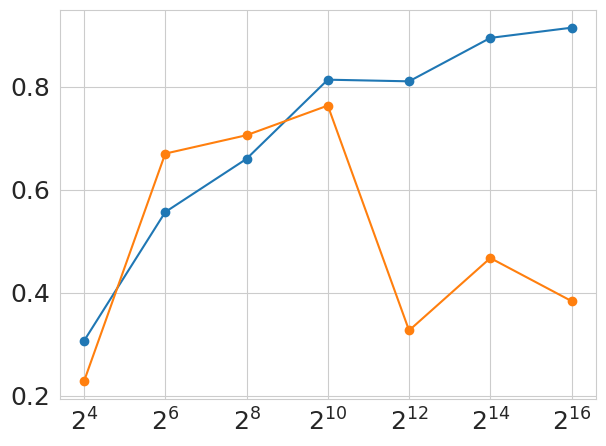

In [20]:
# plt.rcParams['text.usetex'] = False
# plt.rcParams['figure.dpi'] = 150
# plt.rcParams['figure.figsize'] = (4,4)
# plt.rcParams['font.family'] = 'serif'

sns.set_style("whitegrid")
fig,ax = plt.subplots()
ax.set_xscale("log",base=2)

from matplotlib.ticker import FuncFormatter


ax.plot(fsq_df['codebook'].values, fsq_df['structure_reconstruction/tmscore_median'].values, label="FSQ", marker="o")
ax.plot(vq_df['codebook'].values, vq_df['structure_reconstruction/tmscore_median'].values, label="VQ-VAE", marker="o")
ax.set_xticks(np.power(2, np.arange(4, 17, 2)))
plt.tight_layout()
plt.show()

In [13]:
fsq_df.ID.values

array(['nvn50hrl', 'i0849b6g', 'plnochic', 'o039qrp2', '9nsanh7x',
       'xcx6zvhg', '7dga88v8'], dtype=object)

# scrape metrics from logged histograms

In [14]:
import wandb
import json

api = wandb.Api()
run = api.run(f"lu-amy-al1/plaid-hourglass-2/{fsq_df.ID[0]}")

In [15]:
def run_id_to_stats(run_id, category="structure_reconstruction",metric="tmscore"):
    api = wandb.Api()
    run = api.run(f"lu-amy-al1/plaid-hourglass-2/{run_id}")
    x = run.summary[f'{category}/{metric}_hist']['bins']
    y = run.summary[f'{category}/{metric}_hist']['values']
    x = np.array(x)
    midpoints = (x[1:] + x[:-1]) / 2
    
    mean = np.average(midpoints, weights=y)
    variance = np.average((midpoints - mean) ** 2, weights=y)
    std = np.sqrt(variance)
    return mean, variance, std

In [16]:
def scrape_multi_run_values(df, metric="tmscore", category="structure_reconstruction"):
    # get FSQ metrics
    means = []
    stds = []
    
    for id_ in df.ID:
        mean, _, std = run_id_to_stats(id_, category, metric=metric)
        means.append(mean)
        stds.append(std)
    
    means = np.array(means)
    stds = np.array(stds)
    return means, stds


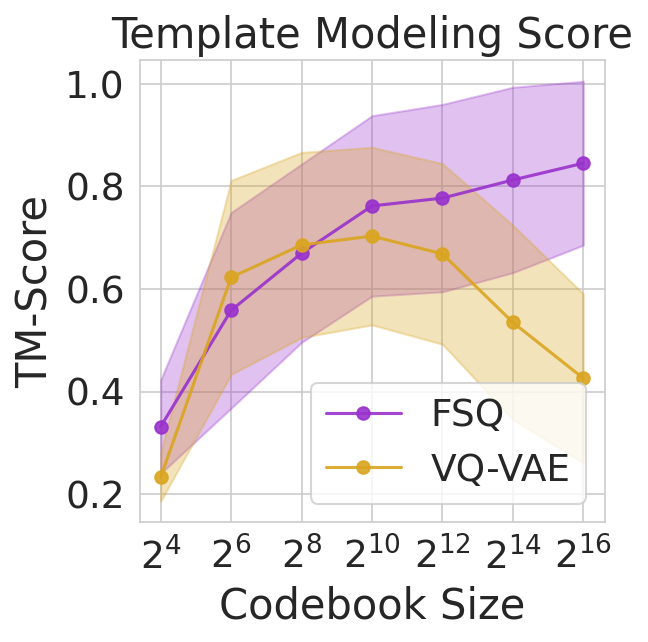

In [38]:
metric = "tmscore"

plt.rcParams['text.usetex'] = False
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (4,4)
plt.rcParams['font.family'] = 'serif'


sns.set_style("whitegrid")
fig, ax = plt.subplots()

fsq_means, fsq_stds = scrape_multi_run_values(fsq_df, metric)
vq_means, vq_stds = scrape_multi_run_values(vq_df, metric)

ax.set_xscale("log",base=2)
ax.set_xticks(np.power(2, np.arange(4, 17, 2)))

codebook = fsq_df.codebook

# FSQ plot
ax.plot(codebook, fsq_means ,marker="o",color='darkorchid', alpha=0.9, label="FSQ")
ax.fill_between(codebook, fsq_means + fsq_stds, fsq_means - fsq_stds, alpha=0.3,color='darkorchid')

# VQ plot
ax.plot(codebook, vq_means ,marker="o",color='goldenrod', alpha=0.9, label="VQ-VAE")
ax.fill_between(codebook, vq_means + vq_stds, vq_means - vq_stds, alpha=0.3,color='goldenrod')

ax.set_title('Template Modeling Score')
ax.set_ylabel("TM-Score")
ax.set_xlabel('Codebook Size')
plt.legend()

plt.show()

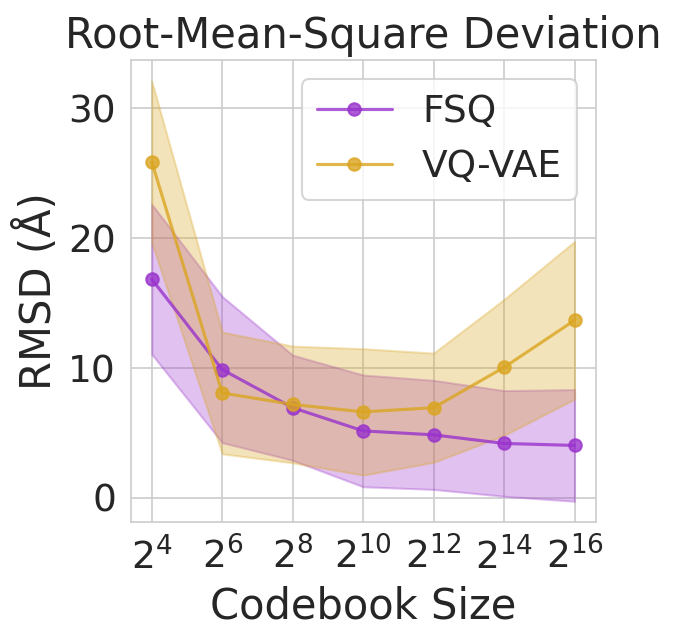

In [39]:
metric = "rmsd"



sns.set_style("whitegrid")
fig, ax = plt.subplots()

fsq_means, fsq_stds = scrape_multi_run_values(fsq_df, metric)
vq_means, vq_stds = scrape_multi_run_values(vq_df, metric)

ax.set_xscale("log",base=2)
ax.set_xticks(np.power(2, np.arange(4, 17, 2)))

codebook = fsq_df.codebook

# FSQ plot
ax.plot(codebook, fsq_means ,marker="o",color='darkorchid',label="FSQ", alpha=0.8)
ax.fill_between(codebook, fsq_means + fsq_stds, fsq_means - fsq_stds, alpha=0.3,color='darkorchid')

# VQ plot
ax.plot(codebook, vq_means ,marker="o",color='goldenrod',label="VQ-VAE", alpha=0.8)
ax.fill_between(codebook, vq_means + vq_stds, vq_means - vq_stds, alpha=0.3,color='goldenrod')

ax.set_title("Root-Mean-Square Deviation")
ax.set_ylabel("RMSD (Å)")
ax.set_xlabel("Codebook Size")
plt.legend()
plt.show()

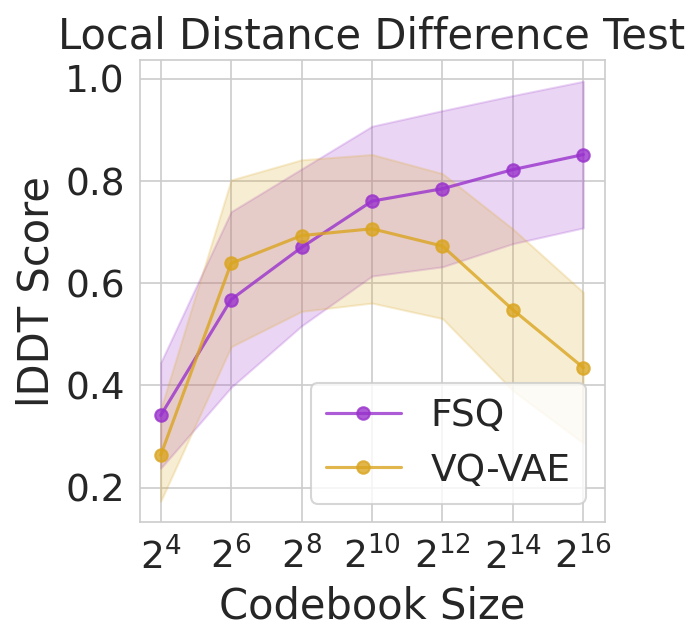

In [51]:
metric = "lddt"

sns.set_style("whitegrid")
fig, ax = plt.subplots()

fsq_means, fsq_stds = scrape_multi_run_values(fsq_df, metric)
vq_means, vq_stds = scrape_multi_run_values(vq_df, metric)

ax.set_xscale("log",base=2)
ax.set_xticks(np.power(2, np.arange(4, 17, 2)))

codebook = fsq_df.codebook

# FSQ plot
ax.plot(codebook, fsq_means ,marker="o",color='darkorchid',label="FSQ", alpha=0.8)
ax.fill_between(codebook, fsq_means + fsq_stds, fsq_means - fsq_stds, alpha=0.2,color='darkorchid')

# VQ plot
ax.plot(codebook, vq_means ,marker="o",color='goldenrod',label="VQ-VAE", alpha=0.8)
ax.fill_between(codebook, vq_means + vq_stds, vq_means - vq_stds, alpha=0.2,color='goldenrod')

ax.set_title("Local Distance Difference Test")
ax.set_ylabel("lDDT Score")
ax.set_xlabel("Codebook Size")
plt.legend()
plt.show()

# no error bar metrics

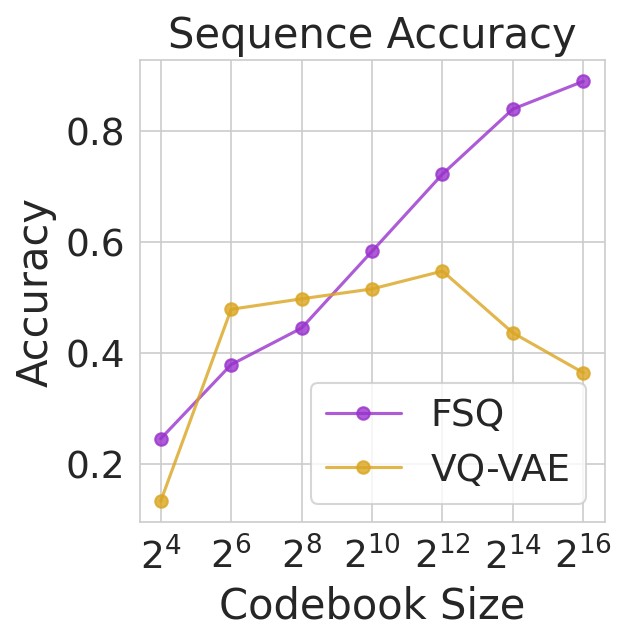

In [47]:
metric = "seq_acc"
category = "val"

# 'val/recons_loss', 'val/seq_acc', 'val/seq_loss',
#        'train/vq_loss', 'train/vq_perplexity', 'val/vq_loss',
#        'val/vq_perplexity', 'cfg.hourglass.downproj_factor',
#        'cfg.hourglass.shorten_factor', 'Created',

sns.set_style("whitegrid")
fig, ax = plt.subplots()

ax.set_xscale("log",base=2)
ax.set_xticks(np.power(2, np.arange(4, 17, 2)))
codebook = fsq_df.codebook

fsq_y = fsq_df[f"{category}/{metric}"].values
vq_y = vq_df[f"{category}/{metric}"].values

# FSQ plot
ax.plot(codebook, fsq_y ,marker="o",color='darkorchid',label="FSQ", alpha=0.8)
# VQ plot
ax.plot(codebook, vq_y ,marker="o",color='goldenrod',label="VQ-VAE", alpha=0.8)

ax.set_title("Sequence Accuracy")
ax.set_ylabel("Accuracy")
ax.set_xlabel("Codebook Size")
plt.legend()
plt.show()

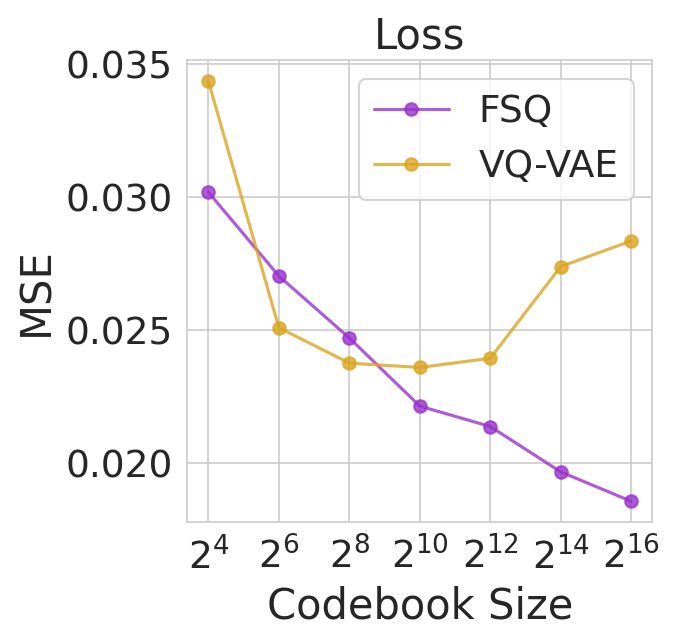

In [46]:
metric = "recons_loss"
category = "val"

# 'val/recons_loss', 'val/seq_acc', 'val/seq_loss',
#        'train/vq_loss', 'train/vq_perplexity', 'val/vq_loss',
#        'val/vq_perplexity', 'cfg.hourglass.downproj_factor',
#        'cfg.hourglass.shorten_factor', 'Created',

sns.set_style("whitegrid")
fig, ax = plt.subplots()

ax.set_xscale("log",base=2)
ax.set_xticks(np.power(2, np.arange(4, 17, 2)))
codebook = fsq_df.codebook

fsq_y = fsq_df[f"{category}/{metric}"].values
vq_y = vq_df[f"{category}/{metric}"].values

# FSQ plot
ax.plot(codebook, fsq_y ,marker="o",color='darkorchid',label="FSQ", alpha=0.8)
# VQ plot
ax.plot(codebook, vq_y ,marker="o",color='goldenrod',label="VQ-VAE", alpha=0.8)

ax.set_title("Loss")
ax.set_ylabel("MSE")
ax.set_xlabel("Codebook Size")
plt.legend()
plt.show()

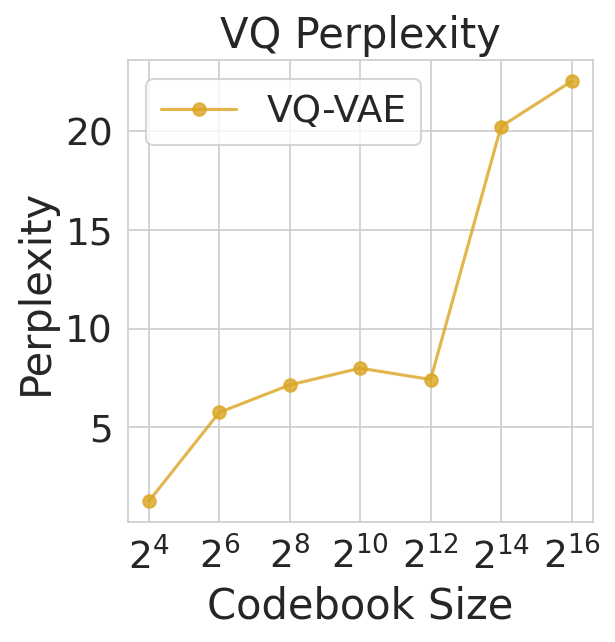

In [50]:
sns.set_style("whitegrid")
fig, ax = plt.subplots()

ax.set_xscale("log",base=2)
ax.set_xticks(np.power(2, np.arange(4, 17, 2)))

ax.plot(codebook, vq_df['val/vq_perplexity'], marker="o",color='goldenrod',label="VQ-VAE", alpha=0.8)

ax.set_title("VQ Perplexity")
ax.set_ylabel("Perplexity")
ax.set_xlabel("Codebook Size")
plt.legend()

In [175]:
run_id = "mu72a8vd"
api = wandb.Api()
run = api.run(f"lu-amy-al1/plaid-hourglass-2/{run_id}")
# x = run.summary[f'{category}/{metric}_hist']['bins']
# y = run.summary[f'{category}/{metric}_hist']['values']
# x = np.array(x)
# midpoints = (x[1:] + x[:-1]) / 2

# mean = np.average(midpoints, weights=y)
# variance = np.average((midpoints - mean) ** 2, weights=y)
# std = np.sqrt(variance)

In [64]:

def get_codebook_utilization(run_id, mode='fsq'):
    api = wandb.Api()
    run = api.run(f"lu-amy-al1/plaid-hourglass-2/{run_id}")
    metric = "compressed_rep"
    category = "structure_reconstruction"
    x = run.summary[f'{category}/{metric}_hist']['bins']
    y = run.summary[f'{category}/{metric}_hist']['values']
    x = np.array(x)

    if mode == 'fsq':
        codebook_size = int(mapping_fn(run.config['fsq_levels'].replace(" ", "")))
    elif mode == "vq":
        codebook_size = int(run.config['n_e'])
    return x, y, codebook_size
    # midpoints = (x[1:] + x[:-1]) / 2
    
    # fig, ax = plt.subplots(figsize=(3,3), dpi=200)
    # if mode == 'fsq':
    #     ax = sns.barplot(x=midpoints, y=y, color='darkorchid',alpha=0.8)
    #     ax.set_title(f"FSQ levels: {run.config['fsq_levels']}")
    # elif mode == "vq":
    #     ax = sns.barplot(x=midpoints, y=y, color='goldenrod',alpha=0.8)
    #     ax.set_title(f"VQ codebook size: {run.config['n_e']}")
    # ax.set_xticks([])
    # plt.show()

In [66]:
fsq_res = {}
vq_res = {}

for run_id in fsq_df.ID.values:
    print(run_id)
    x, y, codebook_size = get_codebook_utilization(run_id,mode='fsq')
    fsq_res[codebook_size] = {"x": x, "y": y}

for run_id in vq_df.ID.values:
    print(run_id)
    x, y, codebook_size = get_codebook_utilization(run_id,mode='vq')
    vq_res[codebook_size] = {"x": x, "y": y}

nvn50hrl
i0849b6g
plnochic
o039qrp2
9nsanh7x
xcx6zvhg
7dga88v8
5lha1r65
sbrib6ob
4p7efzza
a1z93f0w
qmbg5t8m
pjr3qhkp
g69njjq4


In [75]:
keys = list(fsq_res.keys())
print(keys)

[16, 64, 256, 1024, 4096, 16384, 65536]


6175


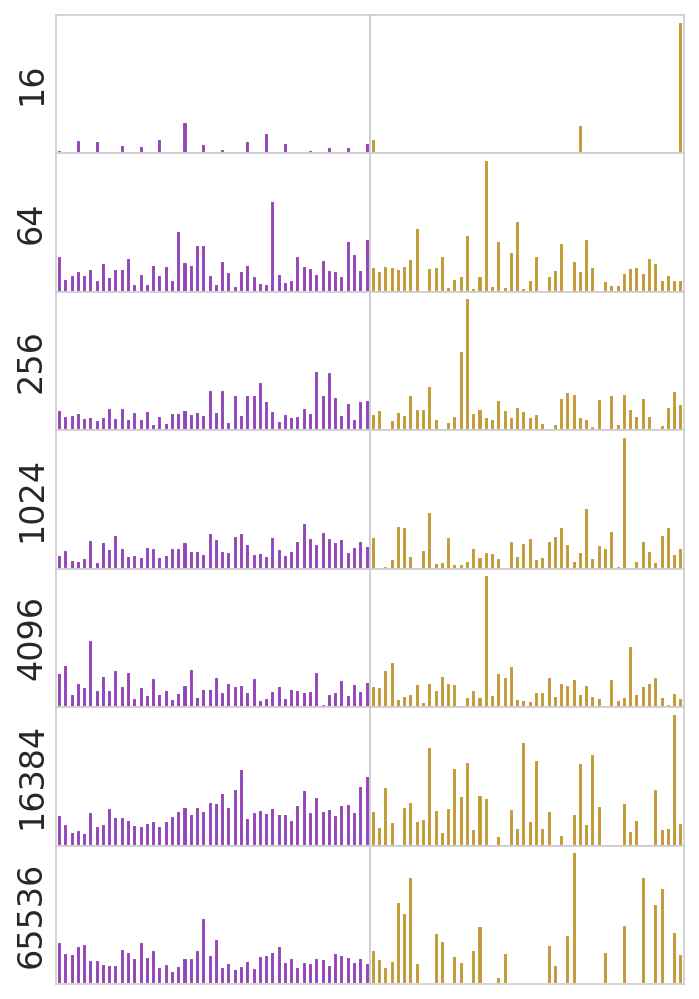

In [115]:
fig, axs = plt.subplots(len(fsq_res.keys()), 2, figsize=(5, 7), sharey="row")

ymax = 0

for i in range(len(keys)):
    key = keys[i]
    vqx = vq_res[key]['x']
    vqy = vq_res[key]['y']
    fsqx = fsq_res[key]['x']
    fsqy = fsq_res[key]['y']
    ymax = max(max(fsqy), max(vqy), ymax)
    
    vq_midpoints = (vqx[1:] + vqx[:-1]) / 2
    fsq_midpoints = (fsqx[1:] + fsqx[:-1]) / 2

    sns.barplot(x=fsq_midpoints, y=fsqy, color='darkorchid',alpha=1, ax=axs[i,0])
    sns.barplot(x=vq_midpoints, y=vqy, color='goldenrod',alpha=1, ax=axs[i, 1])
    axs[i,0].set_xticks([])
    axs[i,0].set_yticks([])
    # axs[i,0].set_title(f"{key}")
    axs[i,0].set_ylabel(f"{key}", fontsize=16)
    
    axs[i,1].set_xticks([])
    axs[i,1].set_yticks([])
    plt.tight_layout()
plt.setp(ax.patches, linewidth=0)
plt.subplots_adjust(wspace=0, hspace=0)
print(ymax)
plt.show()